<a href="https://colab.research.google.com/github/Rajeeb321123/Deep-learning-tensorFlow-Journey/blob/master/10_time_series_forecasting_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict🤑💰📈

To predict the price of Bitcoin based on historical price of Bitcoin.

Links:
* https://github.com/mrdbourke/tensorflow-deep-learning
* Book version: https://dev.mrdbourke.com/tensorflow-deep-learning/
* About Time series: https://otexts.com/fpp3/

## Get Data


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-04-30 13:26:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-04-30 13:26:29 (6.71 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time series with pandas

In [ ]:
# import with pandas
import pandas as pd
# Let's read in our bitcoin data and parse the data
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"]) # parse the date column and tell pandas column 1 is a date time.
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# How many samples we have?
len(df)

2787

Though we've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually likes lots and lots of samples ( thousands to tens of thousands  to millions ).

A smaller number of samples is something you'll often run into with time serises of data problems.

> 🔑 **Note** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has seasonality of daily or value of 365 because we collect one sample per day meaning we will get 365 per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


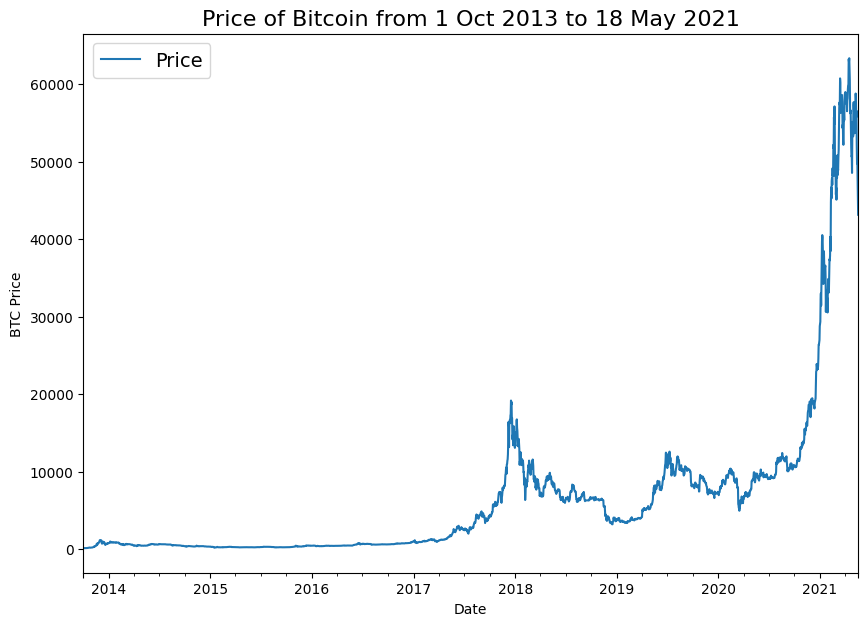

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')

## Import time series data with Python's CSV module

In [ ]:
# # importing and formating historical Bitcoin data with Python
# import csv
# from datetime import datetime

# with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', mode='r') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     print(type(csv_reader)) # delimiter what comes between the column. see the csv file in raw to see comma
#     line_count = 0

#     for row in csv_reader:
#       if line_count == 0:
#           print(f'Column are {", ".join(row[:3])}')
#           line_count += 1
#       else:
#           print(f'\t{row[0]} value in {row[1]} was {row[2]}.')
#           line_count += 1
#       if line_count > 10:
#         break

#     print(f'Processed {line_count} lines.')

In [ ]:
# Importing and formating historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', mode='r') as f:
  csv_reader = csv.reader(f, delimiter=',')  # delimiter what comes between the column. see the csv file in raw to see comma
  next(csv_reader) # skip the top row. We dont want the header

  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # time is in index 1
    btc_price.append(float(line[2])) # Get closing price as fload

# View first 10 of each
timesteps[:10],btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

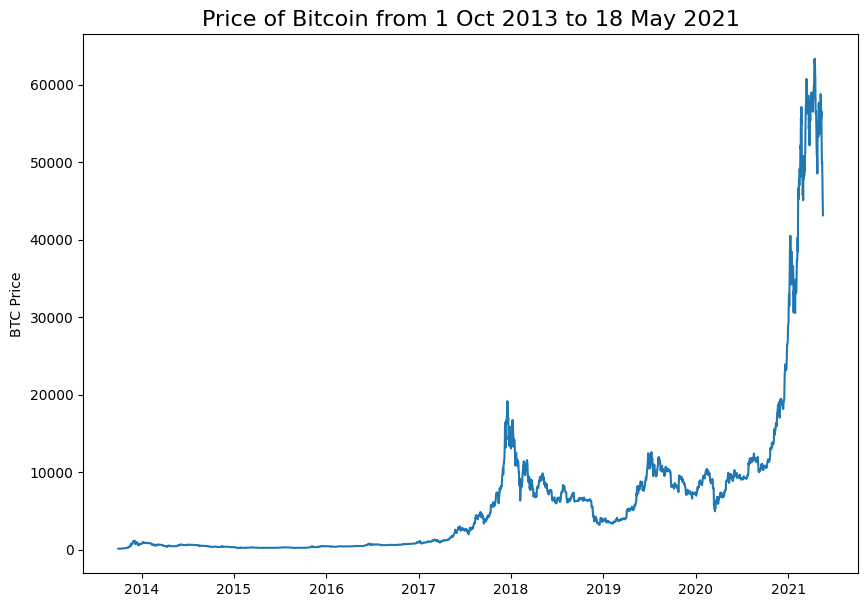

In [ ]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
# plt.legend(fontsize=14, loc='upper left') no legend in python csv

## Format data part 1: Create train and test sets of our time series data

### Creating train and test set with time series data (wrong way)

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    # random split is wrong for time series problem
                                                    random_state=42, # split the data randomly
                                                    )

X_train[:10], y_train[:10]

(array(['2015-05-23T00:00:00.000000000', '2017-11-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', '2014-01-09T00:00:00.000000000',
        '2014-08-12T00:00:00.000000000', '2019-11-26T00:00:00.000000000',
        '2015-11-28T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
        '2018-04-10T00:00:00.000000000', '2014-06-19T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([ 240.1588    , 9573.9675    , 8513.20388193,  860.84166   ,
         566.31625   , 7211.86180875,  354.954     ,  419.338     ,
        6789.2675    ,  601.88666   ]))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

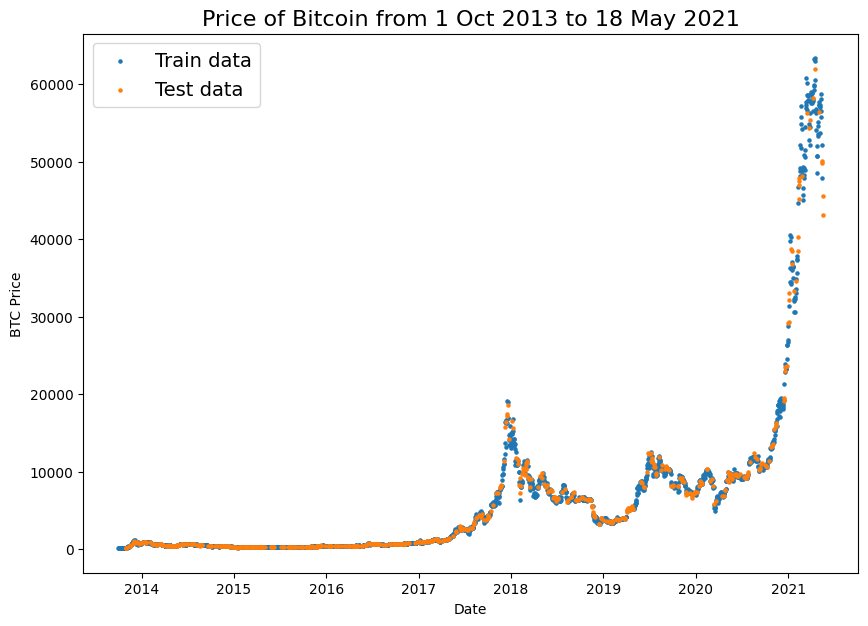

In [ ]:
# Let's plot wrong train and test split data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

# data leakage issue
# test data should simulate future in time series (psuedo future)

### Create train and test sets for time series (right way)

In [ ]:
# Create a train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train and 20% test

# Create train data splits (everyting before the splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test splits (everyting beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

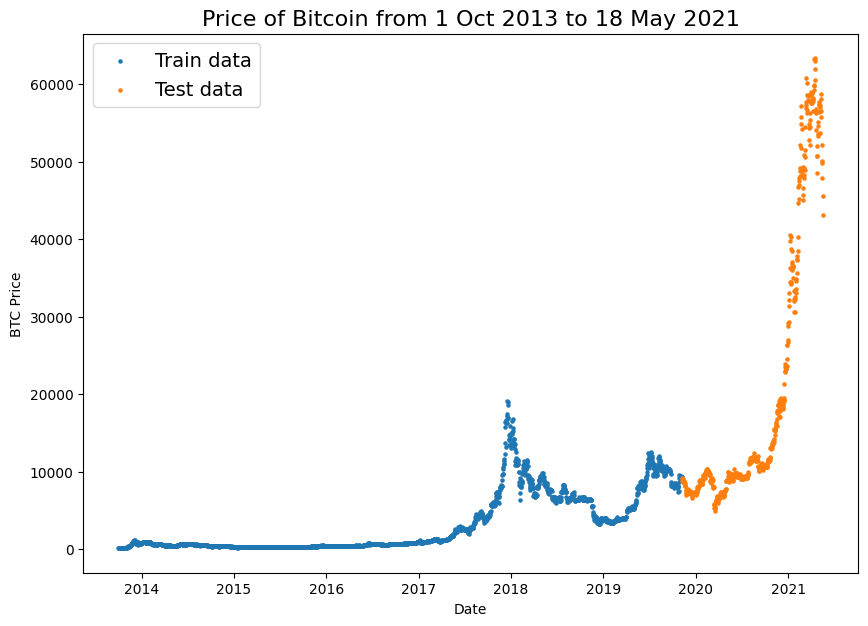

In [ ]:
# Plot the correctly made splts
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.legend(fontsize=14, loc='upper left')
plt.show()

# test data is simulating futre (right way)

## Create a plotting functions

Typing plotting code is tedious, let's functionize it

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format = ".", start = 0, end=None, label = None):
  """
  Plot timesteps (a series of points in time) against values (a series of values across timesteps)

  Parameters
  ----------
  timesteps: array of timesteps values
  values: array of values across time
  format: style of plot, default is "."
  start: where to start the plot (setting a value will index from start of timesteps)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about the values
  """
  # Plot the series
  plt.plot(timesteps[start:end],
           values[start:end],
           format,
           label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")

  if label:
    plt.legend(fontsize = 14) # label bigger

  plt.grid(True)

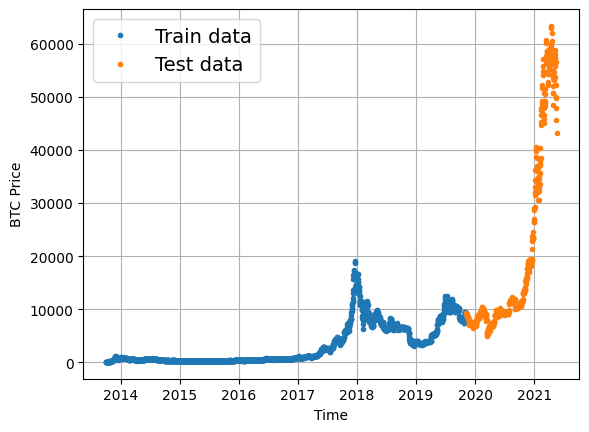

In [ ]:
# Test out plotting  fucntions
plot_time_series(timesteps=X_train,values=y_train, label="Train data")
plot_time_series(timesteps=X_test,values=y_test, label="Test data")

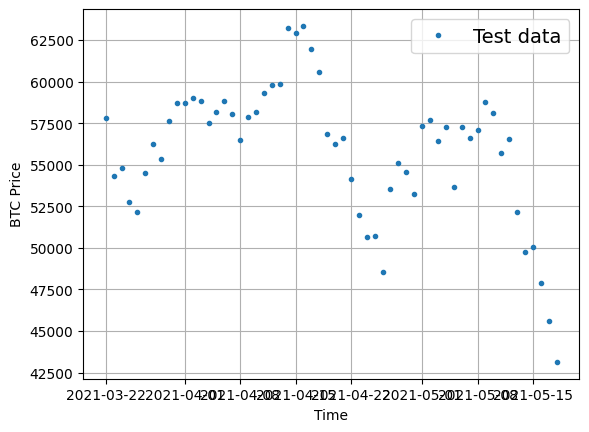

In [ ]:
# plot_time_series(timesteps=X_train,values=y_train, start=1500, label="Train data")
plot_time_series(timesteps=X_test,values=y_test,start=500, label="Test data")

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the futre we're going to predict
* **Window size** = number of timesteps we're going to use to predict **Horizon**

Modelling experiments we're running:
* model 0  Naive model (baseline)
* model 1  Dense mdoel 1, horizon = 1, window = 7
* model 2  Same as 1, horizon = 1, window = 30
* model 3  Same as 1, horizon = 7, window = 30
* model 4  Conv1D
* model 6  LSTM
* model 7  Same as 1 (but with multivariate data)
* model 8  N-BEATs Algorithm
* model 9  Future predictin model (model to predict future values)
* model 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for horizon of 1.

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

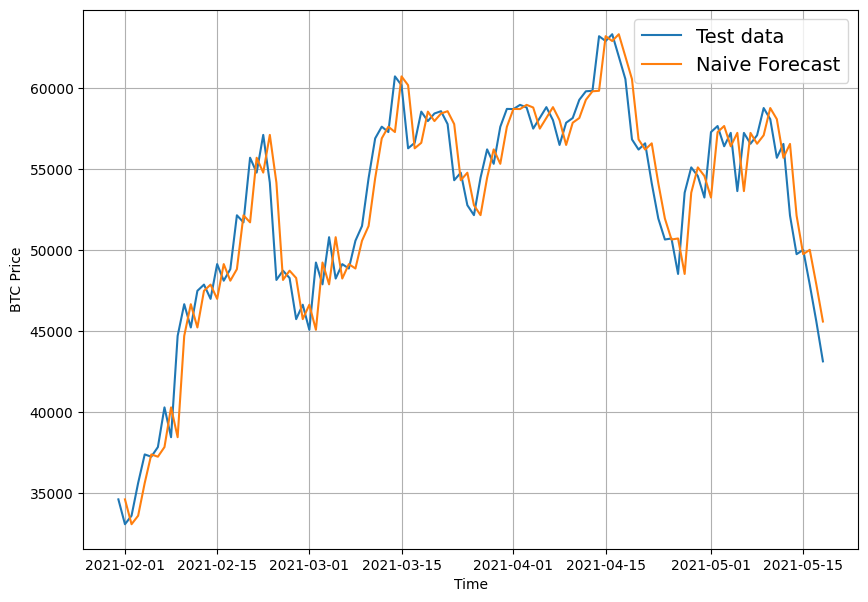

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=450, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=450, format='-', label="Naive Forecast")

> ⚒️ **Exercise**: spend 10 minutes reading the simple forecasts chapter of [forecasting: Principles in Practice](https://otexts.com/fpp3/simple-methods.html). And have as search to find out why the naive forecast is hard to beat, does the term augoregressive come up.

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root means square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error.

The main thing we're evaluating here is: **How do our model's forecast (y_pred) compare against the actual values (y_true or ground truth values)?**

📖 **Resource**: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8: https://otexts.com/fpp3/accuracy.html

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)

  mase = mae / mae_naive_no_season
  return mase

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred=naive_forecast).numpy() # naive_forecast is 1 (near it)

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  lower value here is better model
  """
  # Make sure float 32 datatype {for metric calcuations}
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # mse = tf.reduce_mean(tf.square(y_true-y_pred))
  # rmse = tf.math.sqrt(mse)
  # mape = tf.reduce_mean(tf.abs((y_true-y_pred)/ y_true)) * 100
  # mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)
  # mase = mae / mae_naive_no_season


  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)



  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy(),
          }



In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:], y_pred=naive_forecast)
naive_results

# lower value is better for all metrics

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
naive_forecast[-10:] # according to mae each value is 567 away from real value

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

# Tip if our prediction are near max, error percentage goes down as 567 mae is less than 63346 but at average and lower value, error goes up

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baseline and for actual forecasts

In this notebook, we're focused on Tensorflow and deep learning models.

However there are plenty of other styles of timeseries forecasting models we may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

We may we look at amazing facebook time series forecasting: https://github.com/facebookresearch/Kats for future learning.

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]

```

In [ ]:
len(y_train)

2229

In [ ]:
# What we want to do with our data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [ ]:
# let's setup global variable for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: {[0, ,1, 2, 3, 4, 5, 6], [7]} # first 7 as features and last one as label
  """

  return x[:, :-horizon], x[:, -horizon:]  # tuple

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've go a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

To speed things up, we'll leverage Numpy's array indexing.

must_learn_numpy_indexing: may be little tough but most do all: https://numpy.org/doc/stable/user/basics.indexing.html

Our function will:
1. Create a window step of specific window size (eg. [0,1,2,3,4,5,6]).
2. Use Numpy Indexing to create a 2D array of multiple window steps, for example: (increase of 1 in each):
```
[[0, 1, 2, 3, 4, 5, 6]],
[[1, 2, 3, 4, 5, 6, 7]],
[[2, 3, 4, 5, 6, 7, 8]],
[[3, 4, 5, 6, 7, 8, 9]],
```

3. Uses the 2D array of mulitple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_window()` function we created above to turn the window steps into window with a specified horizon.

> 📖 **Resources:** The function we're about to create has been adapted from the following article:
https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [ ]:
import numpy as np

In [ ]:
# Create function to view NumPy arrays as windows: much faster than using for loop: POWER OF NUMPY
def make_windows(x, window_size = WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into 2D array of sequential labelled windows of window_size with horizon size labels.
  """

  # 1. Create a window of specific window_size (add the horizon on the end of labeeling later)
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  # window_size + horizon - 1 so when we react at the end we don't want to drift out of range and -1 or it will be plus for len(x) because up to element 7 away from end
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis = 0).T # Create 2D array of window of size  window size
  print(f"Window indexs:\n {window_indexes[:5], window_indexes.shape} \n\n")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  print(f"Window array:\n {windowed_array[:5], windowed_array.shape} \n\n\n")

  # 4. Get the labelled window
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  print(f"Window :\n {windows[:5], windows.shape} \n\n\n")
  print(f"labels :\n {labels[:5], labels.shape} \n\n\n")

  return windows, labels


In [ ]:
len(prices)

2787

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]]), (2780, 8)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116, 125.27966],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966, 125.9275 ]]), (2780, 8)) 



Window :
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
     

(2780, 2780)

In [ ]:
# View the first three 3 window /labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label [125.96116]


In [ ]:
# View the  three 3 window /labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label [43144.47129086]


In [ ]:
prices[-1] # last label is our last value in prices array

43144.4712908603

🔑 **Note** You can find a function which achieves similar results to the ones we implemented above at tf.keras.preprocessing.timeseries_dataset_from_array(). Just like ours, it takes in an array and return a windowed datasets from benefit of returning data in the form of a tf.data. Dataset instance (we'll see how to do this with our own data later).

In [ ]:
# from tensorflow import keras
# dataset = keras.preprocessing.timeseries_dataset_from_array(data = prices[:-7],
#                                                             targets = prices[7:],
#                                                             sequence_length = 7,
#                                                             batch_size = None # default value
#                                                             )

## Turning window into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2 ):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  print(int(len(windows)*0.8))
  # 80% train/ 20% test
  split_size = int(len(windows)*(1 - test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2224


(2224, 556, 2224, 556)

In [ ]:
full_labels.shape

(2780, 1)

In [ ]:
1 - 0.2

0.8

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if train labels are same before and after windowing
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our Model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want t0 ocomapre each of our model's best performance against the other model's best performace.

for example if our model performs the best on epochs 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor = "val_loss",
                                            verbose = 0,
                                            save_best_only=True)

## Model 1: Dense model(window=7, Horizon =1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (large batch because only 7 data per week, small overall data).
* 100 epochs.



Why These values?

Druke those these hyperparamter out of lots of experimentaions.

* **HyperParameter** = values a machine learning parctitioner can adjust themselves.
* **Parameters** = values a model learns on its own.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_1_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)]
)


Epoch 1/100
18/18 [==============================] - 4s 148ms/step - loss: 2726.5930 - mae: 2726.5930 - mse: 19494740.0000 - val_loss: 7848.7246 - val_mae: 7848.7246 - val_mse: 112173584.0000
Epoch 2/100
18/18 [==============================] - 1s 71ms/step - loss: 521.3624 - mae: 521.3624 - mse: 1004000.8125 - val_loss: 2407.3206 - val_mae: 2407.3206 - val_mse: 15375878.0000
Epoch 3/100
18/18 [==============================] - 1s 69ms/step - loss: 294.2634 - mae: 294.2634 - mse: 356886.4688 - val_loss: 1412.2991 - val_mae: 1412.2991 - val_mse: 6046205.0000
Epoch 4/100
18/18 [==============================] - 1s 60ms/step - loss: 245.3540 - mae: 245.3540 - mse: 300043.8125 - val_loss: 1398.0604 - val_mae: 1398.0604 - val_mse: 5893119.5000
Epoch 5/100
18/18 [==============================] - 1s 67ms/step - loss: 231.5916 - mae: 231.5916 - mse: 280637.5312 - val_loss: 1298.4884 - val_mae: 1298.4884 - val_mse: 5401724.0000
Epoch 6/100
18/18 [==============================] - 1s 66ms/step 

In [ ]:
# Evaluate model on test data # remember this isnot best from model_1. We have saved best one with checkpoint callback
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.8406 - mae: 572.8406 - mse: 1184449.8750


[572.840576171875, 572.840576171875, 1184449.875]

In [ ]:
# Load in saved best performing model from model_1 from saved checkpoint
model_1 = tf.keras.models.load_model("/content/model_experiment/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.8406 - mae: 572.8406 - mse: 1184449.8750


[572.840576171875, 572.840576171875, 1184449.875]

## Making forecast with a model_1 (on test dataset)
To make "Forecast" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts because actual forecast are into the future). Let's write a function to:

1. Take in a train_model.
2. Take in some input data (same kind of data the model was trained on).
3. Passes the input data to model's `predict()` method.
4. Returns the predictions.

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predcition

In [ ]:
# Make prediction using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10],len(model_1_preds)

18/18 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8911.93 , 8809.63 , 9014.222, 8801.84 , 8775.844, 8735.794,
        8727.714, 8521.511, 8496.795, 8532.096], dtype=float32)>,
 556)

In [ ]:
test_labels.shape # seems like extra dim but we dont want it it below so we use squeeze

(556, 1)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results # results is very similar to naive model

{'mae': 572.8405,
 'mse': 1184449.9,
 'rmse': 1088.3243,
 'mape': 2.5704918,
 'mase': 1.0063221}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
a = np.array([1,2,3,4,5])

In [ ]:
a[-12:]

array([1, 2, 3, 4, 5])

In [ ]:
len(test_labels[:,0])

556

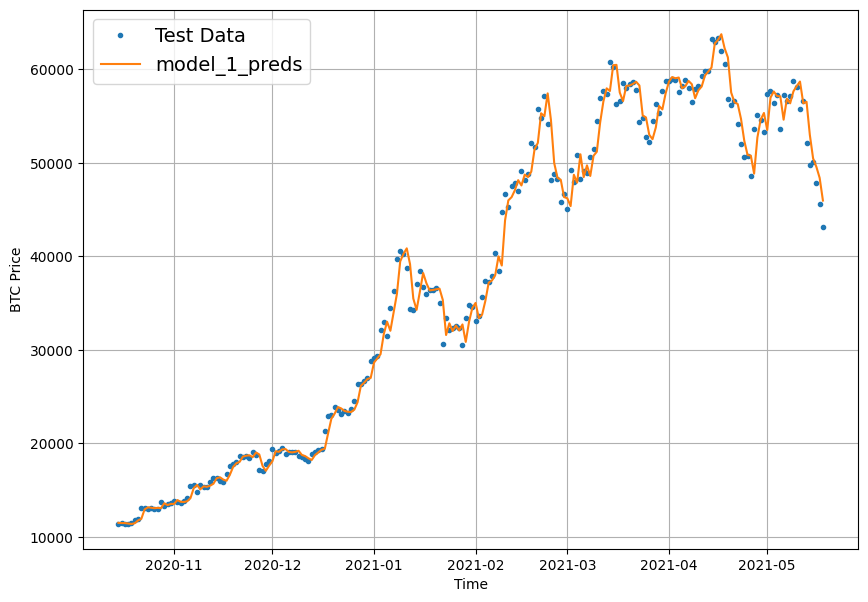

In [ ]:
# Let's plot our model 1 preformance
offset = 340
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:, 0],  # [:, 0 ] just because test_labels is 2D (556,1)
                 start=offset,
                 label= "Test Data" )
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

Why our prediction lags slighty behind actual data: read about **AutoCorrelation** in 2.8 of https://otexts.com/fpp3/acf.html

## Model_2: Dense (window = 30, horizon = 1)

In [ ]:
WINDOW_SIZE = 30 # use 30 prev timestep in past
HORIZON = 1 # predict one step at a time (one day of Bitcoin price from previous 30)

In [ ]:
len(prices)-30

2757

In [ ]:
# Make recreate window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]), (2757, 31)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.

(2757, 2757)

In [ ]:
# Create train and test windows for new window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2205


(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_2_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 [==============================] - 1s 45ms/step - loss: 335.2039 - mae: 335.2039 - mse: 531192.1875 - val_loss: 1747.6808 - val_mae: 1747.6808 - val_mse: 8949589.0000
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 239.6371 - mae: 239.6371 - mse: 260891.1719 - val_loss: 1178.4847 - val_mae: 1178.4847 - val_mse: 4325229.0000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 199.1872 - mae: 199.1872 - mse: 189822.6250 - val_loss: 1221.7556 - val_mae: 1221.7556 - val_mse: 4213473.5000
Epoch 4/100
18/18 [==============================] - 1s 33ms/step - loss: 186.5829 - mae: 186.5829 - mse: 172843.5781 - val_loss: 937.1732 - val_mae: 937.1732 - val_mse: 3079565.0000
Epoch 5/100
18/18 [==============================] - 1s 32ms/step - loss: 167.6368 - mae: 167.6368 - mse: 148755.5938 - val_loss: 901.8292 - val_mae: 901.8292 - val_mse: 2844917.2500
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 189.280

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 676.5464 - mae: 676.5464 - mse: 1473808.5000


[676.54638671875, 676.54638671875, 1473808.5]

In [ ]:
# Load in the best performing model of model_2
model_2 = tf.keras.models.load_model("/content/model_experiment/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.1821 - mae: 594.1821 - mse: 1264007.6250


[594.1820678710938, 594.1820678710938, 1264007.625]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred= model_2_preds)
model_2_results

{'mae': 594.1821,
 'mse': 1264007.5,
 'rmse': 1124.2809,
 'mape': 2.6724494,
 'mase': 1.0386361}

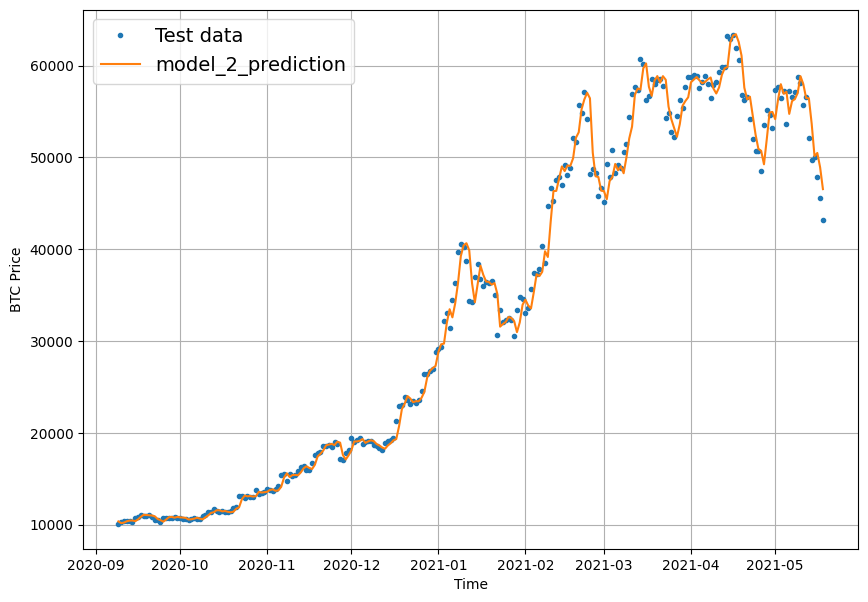

In [ ]:
offset = 300 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,
                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = model_2_preds,
                 format="-",
                 start=offset,
                 label="model_2_prediction")


## Model 3: Dense (Window = 30, horizon = 7)

In [ ]:
WINDOW_SIZE = 30 # use 30 prev timestep in past
HORIZON = 7 # predict 7 step at a time ( 7 day of Bitcoin price from previous 30)

In [ ]:
# Make recreate window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40]]), (2751, 37)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121

(2751, 2751)

In [ ]:
# Create train and test windows for new window
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2200


(2200, 551, 2200, 551)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    # Horizon is 7 so output seven value
    layers.Dense(HORIZON, activation="linear") # linear activation is same as no activation: output same as input
], name = "model_3_dense") # name our model so we can save it by accesing its name by model_1.name

# 2. Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

# 3. Fit the model
model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
18/18 [==============================] - 3s 68ms/step - loss: 1509.4034 - mae: 1509.4034 - mse: 9664378.0000 - val_loss: 3585.1929 - val_mae: 3585.1929 - val_mse: 30211304.0000
Epoch 2/100
18/18 [==============================] - 1s 32ms/step - loss: 523.5767 - mae: 523.5767 - mse: 1200016.2500 - val_loss: 2431.3789 - val_mae: 2431.3789 - val_mse: 18113906.0000
Epoch 3/100
18/18 [==============================] - 1s 32ms/step - loss: 404.1720 - mae: 404.1720 - mse: 808786.5625 - val_loss: 2185.9954 - val_mae: 2185.9954 - val_mse: 14350816.0000
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 369.6065 - mae: 369.6065 - mse: 692476.7500 - val_loss: 1817.3103 - val_mae: 1817.3103 - val_mse: 10434529.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 345.3484 - mae: 345.3484 - mse: 602229.1250 - val_loss: 1949.3206 - val_mae: 1949.3206 - val_mse: 11393516.0000
Epoch 6/100
18/18 [==============================] - 1s 32ms/step -

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1345.9561 - mae: 1345.9561 - mse: 5860687.0000


[1345.9560546875, 1345.9560546875, 5860687.0]

In [ ]:
# load the best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiment/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1246.8737 - mae: 1246.8737 - mse: 5587005.5000


[1246.8736572265625, 1246.8736572265625, 5587005.5]

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5] # output from model_3 predict a week at a time

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9333.328, 9561.499, 9525.191, 9656.348, 9508.071, 9635.381,
        9790.914],
       [9045.257, 9314.45 , 9357.168, 9577.149, 9380.012, 9437.898,
        9529.722],
       [8887.988, 8977.334, 9040.256, 9394.806, 9225.818, 9333.136,
        9388.693],
       [8964.43 , 8864.755, 9058.119, 9220.01 , 9161.466, 9225.066,
        9459.285],
       [8950.759, 8757.674, 8930.647, 9035.793, 8970.475, 9025.707,
        9308.007]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8783.016, 8835.541, 8735.291, 8580.907, 8394.226], dtype=float32)>

In [ ]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results # seems like each result result for each value

{'mae': array([  779.74677 ,   626.1237  ,   529.2027  ,   509.56696 ,
          442.66098 ,   424.3017  ,   461.89355 ,   468.02197 ,
          536.42834 ,   638.8591  ,   799.9624  ,   772.2179  ,
          785.71277 ,   782.0866  ,   571.93915 ,   313.15192 ,
          151.06535 ,   159.71512 ,   219.10387 ,   290.63492 ,
          192.21512 ,   192.36914 ,   289.69803 ,   304.33072 ,
          133.30399 ,    88.584755,   144.67766 ,   177.12215 ,
          168.35637 ,   128.78543 ,   201.566   ,   370.98584 ,
          267.28348 ,   353.78906 ,   252.73473 ,   288.8113  ,
          272.23752 ,   238.51682 ,   217.8201  ,   222.27449 ,
          475.3171  ,    97.37047 ,   118.87793 ,    75.19336 ,
          103.44747 ,   114.972305,    98.00928 ,    74.5526  ,
          141.47112 ,   140.6257  ,   158.82045 ,   119.620186,
          191.29973 ,   129.89795 ,   214.20682 ,   289.0228  ,
          473.6236  ,   540.6675  ,   442.40298 ,   551.1442  ,
          396.3572  ,   227.72098

## Make our evaluation function work for larger horizon

In [ ]:
model_3_results["mae"].shape, model_3_results["mae"].ndim

((551,), 1)

In [ ]:
model_2_results["mae"].shape, model_2_results["mae"].ndim # no shape scaler value

((), 0)

In [ ]:
tf.reduce_mean(model_3_results["mae"]).numpy() # same as model_3.evaluate

1246.8738

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1246.8737 - mae: 1246.8737 - mse: 5587005.5000


[1246.8736572265625, 1246.8736572265625, 5587005.5]

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  """
  lower value here is better model
  """
  # Make sure float 32 datatype {for metric calcuations}
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # mse = tf.reduce_mean(tf.square(y_true-y_pred))
  # rmse = tf.math.sqrt(mse)
  # mape = tf.reduce_mean(tf.abs((y_true-y_pred)/ y_true)) * 100
  # mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 only (hence the shift of 1)
  # mase = mae / mae_naive_no_season


  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # We want to aggregate if the mae is multiple in case of multiple y_true
  if (mae.ndim > 0):
    mae = tf.reduce_mean(model_3_results["mae"])
    mse = tf.reduce_mean(model_3_results["mse"])
    mase = tf.reduce_mean(model_3_results["mase"])
    rmse = tf.reduce_mean(model_3_results["rmse"])
    mape = tf.reduce_mean(model_3_results["mape"])



  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy(),
          }

In [ ]:
# Get the model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1246.8738,
 'mse': 5587005.5,
 'rmse': 1433.326,
 'mape': 5.582625,
 'mase': 2.218742}

In [ ]:
model_1_results, naive_results

({'mae': 572.8405,
  'mse': 1184449.9,
  'rmse': 1088.3243,
  'mape': 2.5704918,
  'mase': 1.0063221},
 {'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.5165248,
  'mase': 0.99957})

In [ ]:
model_3_preds[:,6][:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9790.914, 9529.722, 9388.693, 9459.285, 9308.007, 9103.031,
       9024.035, 8834.264, 8630.326, 8522.846], dtype=float32)>

We've made and evaluated predictions with `model_3`. Let's visualize, visualize, visualize

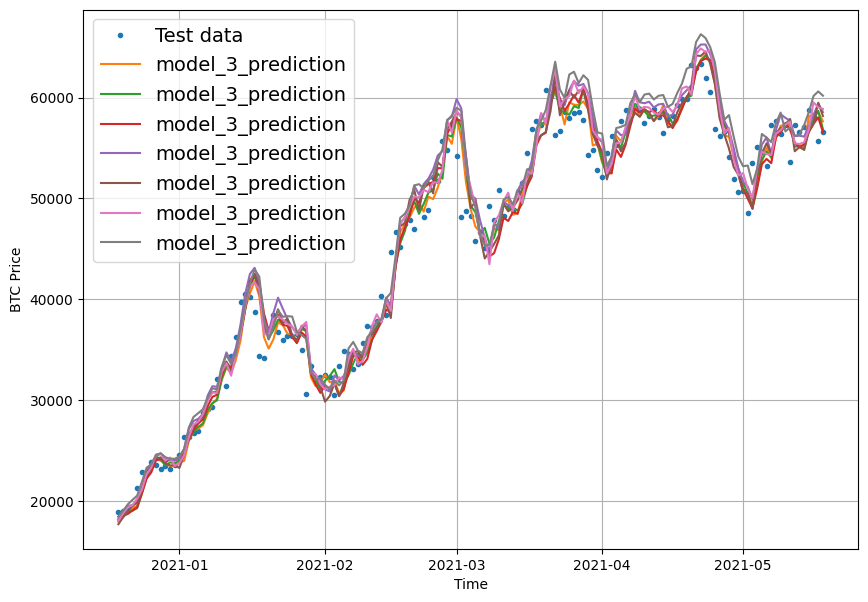

In [ ]:
offset = 400 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,

                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                #  values = model_3_preds[:,6],
                 values = model_3_preds,
                 format="-",
                 start=offset,
                 label="model_3_prediction")

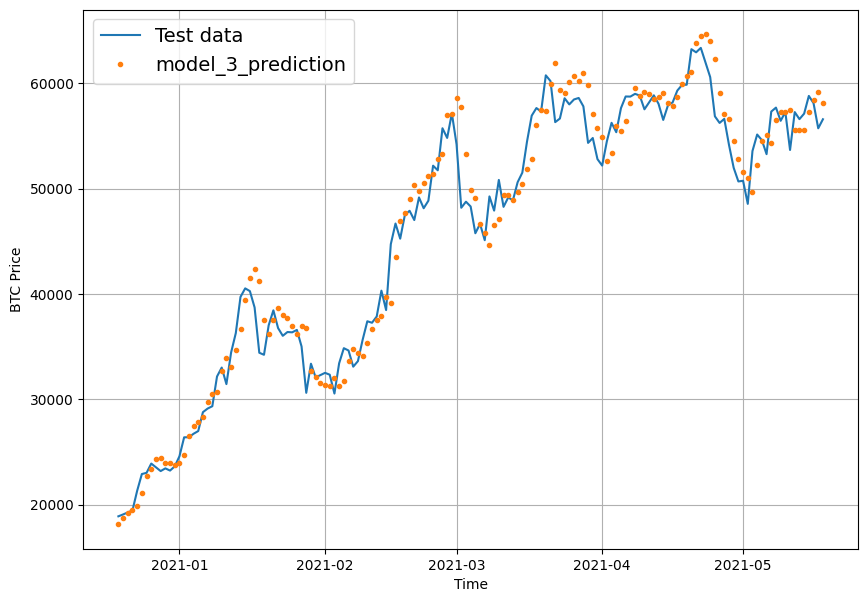

In [ ]:
offset = 400 # for zoom in
plt.figure(figsize=(10, 7))
# Account for test window offset when plotting
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                 values = test_labels[:, 0],
                 start=offset,
                 format='-',
                 label="Test data")
plot_time_series(timesteps=X_test[(-len(test_windows)):],
                #  values = model_3_preds[:,6],
                 # no a good way, just to make plot only
                 # when we use mean we will lose some value
                 values = tf.reduce_mean(model_3_preds, axis = 1), # reducing and gettting mean. axis = 1 means mean of each row or mean along columns (column1+column2..../number)
                 start=offset,
                 label="model_3_prediction")

## Which of our model is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone.

<Axes: >

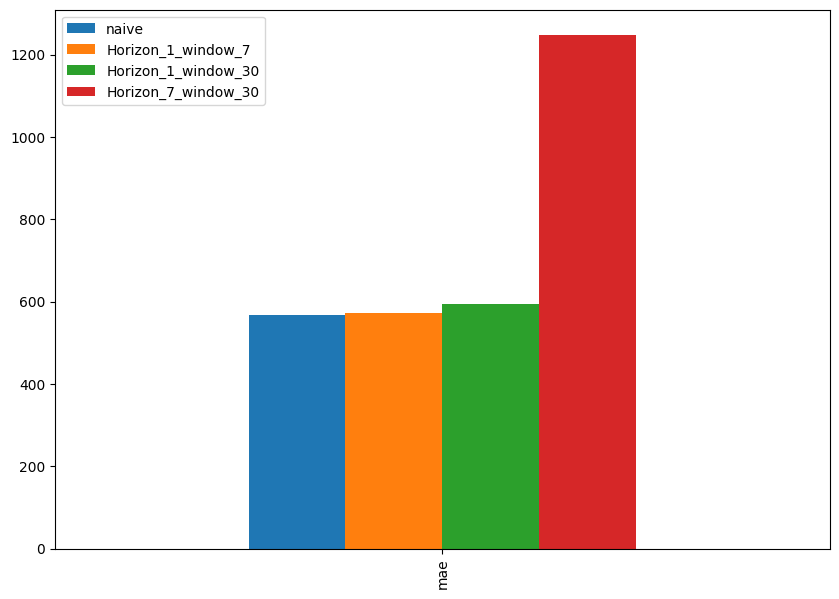

In [ ]:
pd.DataFrame({
    "naive": naive_results["mae"],
    "Horizon_1_window_7": model_1_results["mae"],
    "Horizon_1_window_30": model_2_results["mae"],
    "Horizon_7_window_30": model_3_results["mae"],
             },
     index=["mae"]
    ).plot(figsize=(10, 7), kind="bar")

    # seems like naive model is best because of autocorrelation of time series (google serach, or in https://dev.mrdbourke.com/tensorflow-deep-learning/)

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # predict next day of Bitcoin price
WINDOW_SIZE = 7 # use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexs:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]]), (2780, 8)) 


Window array:
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116, 125.27966],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966, 125.9275 ]]), (2780, 8)) 



Window :
 (array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
     

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

2224


(2224, 2224, 556, 556)

To use the Conv1D, we need an input shape of : `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [ ]:
#Check data input shape
train_windows[0].shape # returns(WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the conv1D layer, we have to reshape it in order to make sure it works.
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
tf.expand_dims(x, axis = 1)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [ ]:
# layers.lambda helps use lambda like in python
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)) # add an extra dimension for  `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded_shape:{expand_dims_layer(x).shape}\n\n")
print(f"Expanded_shape values:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded_shape:(7, 1)


Expanded_shape values:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# 1. Create a Conv1D

from tensorflow.keras import layers

inputs = layers.Input(shape=(7), dtype="float64")
print(inputs.shape)

# lambda layer
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
print(expand_dims_layer.shape)

# Conv1D model, filters = 128, kernel_size=, padding...
x = layers.Conv1D(filters=128, # each review will diveded into 64 parts
                  kernel_size=5, # 5 words at a time
                  strides=1,
                  activation='relu',
                  #padding should be causal for time series, where temporal data order shouldn't be mess with
                  padding='causal')(expand_dims_layer) # padding will compress input like 15 to 13 if 'valid' (default). if 'same' no-compression
print(x.shape)

outputs = layers.Dense(HORIZON, activation="linear")(x) # HORIZON = 1 # number of our ouptut = 1
print(outputs.shape)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_conv1D')

# 2. Compile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])



(None, 7)
(None, 1, 7)
(None, 1, 128)
(None, 1, 1)


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_11 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_14 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 3. Fit the model
model_4.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - 2s 58ms/step - loss: 854.1396 - mae: 854.1396 - mse: 2795720.7500 - val_loss: 2330.9841 - val_mae: 2330.9841 - val_mse: 13701385.0000
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 260.0278 - mae: 260.0278 - mse: 316085.6562 - val_loss: 1184.6713 - val_mae: 1184.6713 - val_mse: 4607272.5000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 206.3361 - mae: 206.3361 - mse: 209261.1094 - val_loss: 1097.0771 - val_mae: 1097.0771 - val_mse: 3979173.7500
Epoch 4/100
18/18 [==============================] - 1s 48ms/step - loss: 197.7900 - mae: 197.7900 - mse: 204619.1562 - val_loss: 1081.5033 - val_mae: 1081.5033 - val_mse: 3845476.2500
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 196.2531 - mae: 196.2531 - mse: 201925.9062 - val_loss: 1083.4852 - val_mae: 1083.4852 - val_mse: 3743155.0000
Epoch 6/100
18/18 [==============================] - 1s 65ms/step - loss:

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_11 (Lambda)          (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_14 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 638.9846 - mae: 638.9846 - mse: 1301622.5000


[638.984619140625, 638.984619140625, 1301622.5]

In [ ]:
# Load back in best performing of model_4
model_4 = tf.keras.models.load_model("/content/model_experiment/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.6966 - mae: 566.6966 - mse: 1162379.8750


[566.6965942382812, 566.6965942382812, 1162379.875]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.033, 8753.314, 9008.37 , 8758.871, 8710.631, 8738.596,
       8658.843, 8501.392, 8446.591, 8507.107], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 566.6966,
 'mse': 1162379.9,
 'rmse': 1078.1372,
 'mape': 2.5331914,
 'mase': 0.99552894}

In [ ]:
model_1_results

{'mae': 572.8405,
 'mse': 1184449.9,
 'rmse': 1088.3243,
 'mape': 2.5704918,
 'mase': 1.0063221}

## Model 5: RNN (LSTM)

In [ ]:
# 1. Create a LSTM model as hidden layer

from tensorflow.keras import layers

inputs = layers.Input(shape=(WINDOW_SIZE), dtype="float64") # window_size = 7
print(inputs.shape)

# lambda layer
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
print(x.shape)

#LSTM layer
# x = layers.LSTM(units=128, return_sequences=True)(expand_dims_layer) # return_sequences = true to maintain ndim =3 otherwise output of lstm will be of 2 ndim
# print(x.shape)
x = layers.LSTM(units=128, activation="relu")(x) # output will of ndim =2 # default activation is tanh but here we need relu
print(x.shape)

# x = layers.Dense(32, activation="relu")(x)
# print(x.shape)



outputs = layers.Dense(HORIZON, activation="linear")(x) # HORIZON = 1 # number of our ouptut = 1
print(outputs.shape)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_conv1D')

# 2. Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae", "mse"])

(None, 7)
(None, 128)
(None, 1)


In [ ]:
# 3. Fit the model
model_5.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)]
)

Epoch 1/100
18/18 [==============================] - 4s 137ms/step - loss: 3050.1177 - mae: 3050.1177 - mse: 22705318.0000 - val_loss: 15169.8457 - val_mae: 15169.8457 - val_mse: 405315648.0000
Epoch 2/100
18/18 [==============================] - 2s 117ms/step - loss: 1650.5933 - mae: 1650.5933 - mse: 7145833.5000 - val_loss: 5306.1626 - val_mae: 5306.1626 - val_mse: 52581316.0000
Epoch 3/100
18/18 [==============================] - 2s 124ms/step - loss: 370.5483 - mae: 370.5483 - mse: 573585.8750 - val_loss: 1459.2611 - val_mae: 1459.2611 - val_mse: 6258512.0000
Epoch 4/100
18/18 [==============================] - 31s 2s/step - loss: 215.9341 - mae: 215.9341 - mse: 219450.6875 - val_loss: 1072.5616 - val_mae: 1072.5616 - val_mse: 3566022.5000
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 186.9353 - mae: 186.9353 - mse: 181659.3281 - val_loss: 1084.1685 - val_mae: 1084.1685 - val_mse: 3587471.2500
Epoch 6/100
18/18 [==============================] - 2s 116ms/

In [ ]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_14 (Lambda)          (None, 1, 7)              0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               69632     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 601.3198 - mae: 601.3198 - mse: 1285612.3750


[601.3197631835938, 601.3197631835938, 1285612.375]

In [ ]:
# Load in best version of model_5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiment/model_5_conv1D")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 601.3198 - mae: 601.3198 - mse: 1285612.3750


[601.3197631835938, 601.3197631835938, 1285612.375]

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8999.448, 8845.558, 8954.758, 8830.637, 8804.651], dtype=float32)>

In [ ]:
# Evaluate model_5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results
# still our model_1 is best one

{'mae': 601.31964,
 'mse': 1285612.2,
 'rmse': 1133.8484,
 'mape': 2.7180512,
 'mase': 1.056352}

In [ ]:
model_1_results

{'mae': 572.8405,
 'mse': 1184449.9,
 'rmse': 1088.3243,
 'mape': 2.5704918,
 'mase': 1.0063221}

🔑**Note:** Because neural networks are such powerfull algorithm, they can be used for almost any problem, however, that doesn't means they'll achieve performant or usable results. You're probably starting to clue onto this now

## Make a multivariate  time series dataset

Before we add a feature to our time series, what is a feature we can use?

Bitcoin price is open system almost anything and affect it on real time.
One feature we could add is whether or not Elon musk tweeted on that day of Bitcoin...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about bitcoin halving events?:(google serach what is bitcoin halving?)
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add bitcoin halving to our dataset
block_reward_1 = 50 # 3 january 2009 - this block reward isn't in our dataset (our dataset start at 01 october 2013)
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 May 2020

# BLock reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-11-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [ ]:
block_reward_2_datetime

In [ ]:
# Create date